In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("dataset/USA_Housing.csv")

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.shape

(5000, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
df = df.drop("Address", axis=1)

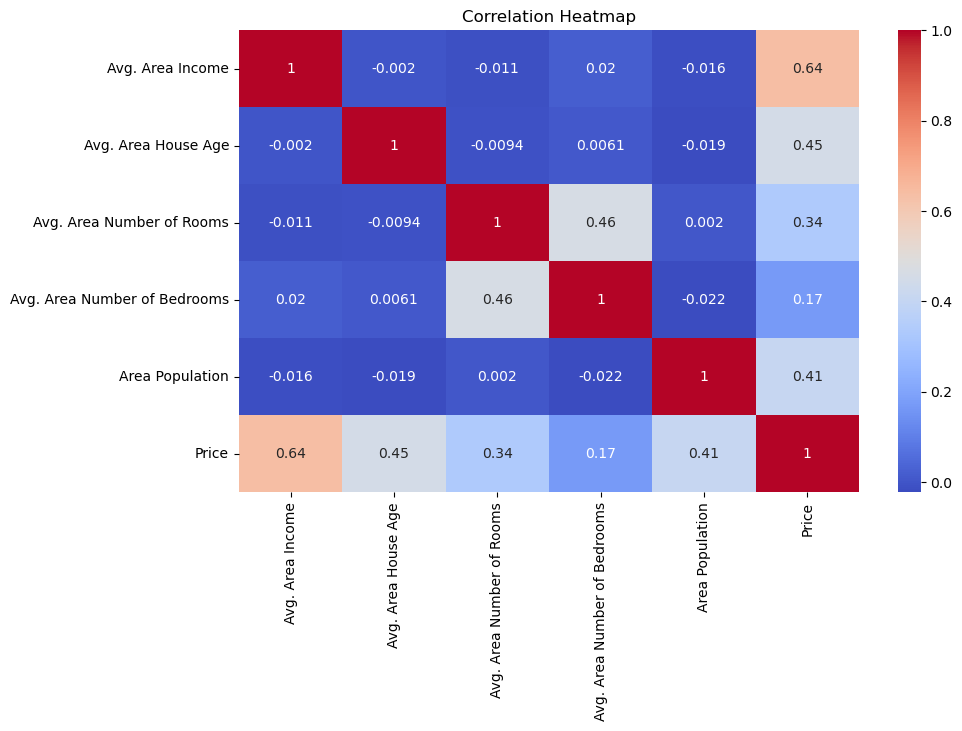

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')


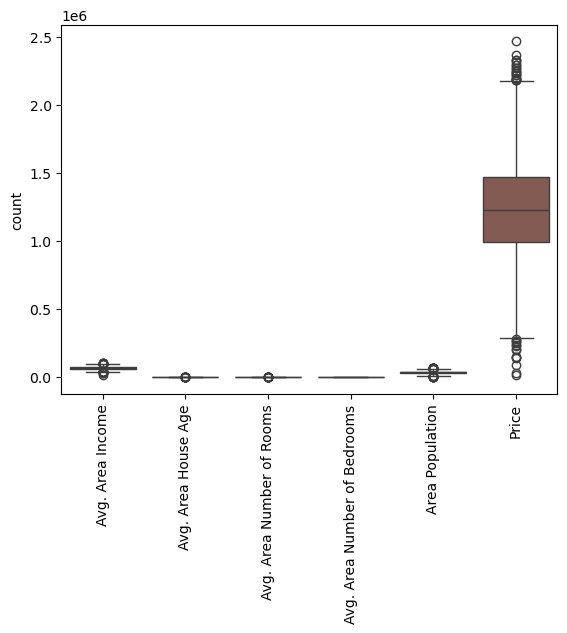

In [9]:
d=df.select_dtypes(include=['float64']).columns
print(d)
sns.boxplot(df[d])
plt.xticks(rotation='vertical')
plt.ylabel('count')
plt.show()

In [10]:
outlier_list=['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Area Population','Price']
for i in outlier_list:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    df=df[(df[i]>Q1-1.5*IQR) & (df[i]< Q3+1.5*IQR)]

In [11]:
X = df.drop("Price", axis=1)
y = df["Price"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print("RMSE:", round(rmse, 2))
print("R² Score:", round(r2, 4))
print("\nModel Coefficients:")
print(pd.Series(model.coef_, index=X.columns))
print("Intercept:", model.intercept_)

Model Evaluation:
RMSE: 100582.11
R² Score: 0.905

Model Coefficients:
Avg. Area Income                223191.558765
Avg. Area House Age             160447.766585
Avg. Area Number of Rooms       119079.819009
Avg. Area Number of Bedrooms      2749.931022
Area Population                 144589.686017
dtype: float64
Intercept: 1229537.487850559


In [19]:
input_data = pd.DataFrame([{
    'Avg. Area Income': 80000,
    'Avg. Area House Age': 4,
    'Avg. Area Number of Rooms': 6,
    'Avg. Area Number of Bedrooms': 3,
    'Area Population': 12000
}])

input_scaled = scaler.transform(input_data)
prediction = model.predict(input_scaled)
print("\nPredicted Price: ₹{:,.2f}".format(prediction[0]))


Predicted Price: ₹663,563.15


In [20]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [21]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)